# REPORT: PLOTS AND TABLES

In [472]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os 
cwd = os.getcwd()
# choose the color palette for the graphs of the report
my_cmap = sns.color_palette("colorblind")

Checkpoint folders

In [473]:
pcasvmdir = cwd+"/runs/"+"24Aug18_102024/" # rf and pca without up
pcasvmdirUP = cwd+"/runs/"+"24Aug18_101856/" # rf and pca with up
gcndir = cwd+"/runs/"+"/24Aug18_165932/" # 1500 steps 128 - 32 - 16

## WITHIN ONE SINGLE SUBJECT CROSS VALIDATION

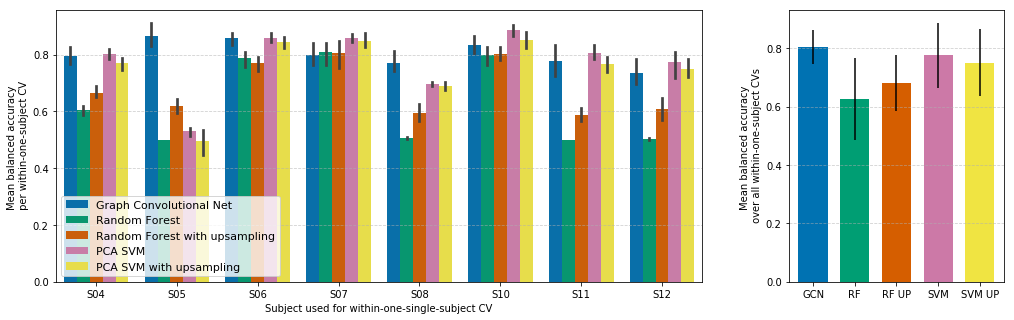

In [474]:
subjects = ["S04", "S05", "S06", "S07", "S08", "S10", "S11", "S12"]

# gcn
meandf = pd.DataFrame(columns = ["mean", "est", "std","estlong"])
gcn = pd.DataFrame(columns = ["balanced_acc", "est", "subj"])
for s in subjects:
    filename = gcndir+"within_"+s+"_gcn"
    tmp = pd.read_csv(filename)
    tmp = tmp[["balanced_acc"]]
    tmp["est"] ="Graph Convolutional Net"
    tmp["subj"]= s
    gcn = gcn.append(tmp, ignore_index=True)
meandf = meandf.append({'est':'GCN',"mean":np.mean(gcn["balanced_acc"]), 
                        "std": np.std(gcn["balanced_acc"]), "estlong": 'Graph Convolutional Net'}, ignore_index=True)
complete = gcn.copy()

# RF
rf = pd.DataFrame(columns = ["balanced_acc", "est", "subj"])
for s in subjects:
    filename = pcasvmdir+"within_"+s+"_rf"
    tmp = pd.read_csv(filename)
    tmp = tmp[["balanced_acc"]]
    tmp["est"] ="Random Forest"
    tmp["subj"]= s
    rf = rf.append(tmp, ignore_index=True)
meandf = meandf.append({'est':'RF',"mean":np.mean(rf["balanced_acc"]), 
                        "std": np.std(rf["balanced_acc"]), "estlong": 'Random Forest'}, ignore_index=True)
complete = complete.append(rf)

# RF UP
rf = pd.DataFrame(columns = ["balanced_acc", "est", "subj"])
for s in subjects:
    filename = pcasvmdirUP+"within_"+s+"_rf"
    tmp = pd.read_csv(filename)
    tmp = tmp[["balanced_acc"]]
    tmp["est"] ="Random Forest with upsampling"
    tmp["subj"]= s
    rf = rf.append(tmp, ignore_index=True)
meandf = meandf.append({'est':'RF UP',"mean":np.mean(rf["balanced_acc"]), 
                        "std": np.std(rf["balanced_acc"]), "estlong": 'Random Forest with upsampling'}, ignore_index=True)
complete = complete.append(rf)

# PCA SVM
svm = pd.DataFrame(columns = ["balanced_acc", "est", "subj"])
for s in subjects:
    filename = pcasvmdir+"within_"+s+"_pcasvm"
    tmp = pd.read_csv(filename)
    tmp = tmp[["balanced_acc"]]
    tmp["est"] ="PCA SVM"
    tmp["subj"]= s
    svm = svm.append(tmp, ignore_index=True)
meandf = meandf.append({'est':'SVM',"mean":np.mean(svm["balanced_acc"]), 
                        "std": np.std(svm["balanced_acc"]), "estlong": 'PCA SVM'}, ignore_index=True)
complete = complete.append(svm)

# PCA SVM UP
svm = pd.DataFrame(columns = ["balanced_acc", "est", "subj"])
for s in subjects:
    filename = pcasvmdirUP+"within_"+s+"_pcasvm"
    tmp = pd.read_csv(filename)
    tmp = tmp[["balanced_acc"]]
    tmp["est"] ="PCA SVM with upsampling"
    tmp["subj"]= s
    svm = svm.append(tmp, ignore_index=True)
meandf = meandf.append({'est':'SVM UP',"mean":np.mean(svm["balanced_acc"]), 
                        "std": np.std(svm["balanced_acc"]), "estlong": 'PCA SVM with upsampling'}, ignore_index=True)
complete = complete.append(svm)

# FIGURE
fig = plt.figure(figsize=(17,5))
widths = [6, 2]
heights = [1]
spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=widths,
                          height_ratios=heights)
#plt.suptitle('Within-one-subject cross validation results', fontsize=16)
fig.add_subplot(spec[0, 0])
sns.barplot(x="subj", y="balanced_acc", hue="est", data=complete, palette = my_cmap, saturation=0.9)
plt.grid(axis='y', ls='dashed', alpha=0.6)
plt.ylabel("Mean balanced accuracy \n per within-one-subject CV")
plt.xlabel("Subject used for within-one-single-subject CV")
plt.legend(loc=3, prop={'size': 11})
fig.add_subplot(spec[0, 1])
plt.bar(meandf["est"], height=meandf["mean"], yerr=meandf["std"], width=0.7, color=my_cmap)
plt.grid(axis='y', ls='dashed', alpha=0.6)
plt.ylabel("Mean balanced accuracy \n over all within-one-subject CVs")
#plt.savefig(cwd+'/reports/'+"single.png", dpi=900) 
plt.show()
fig.tight_layout()

In [475]:
meandf = meandf[['estlong', 'mean', 'std']]
meandf.columns = ["Estimator", "Mean balanced accuracy over all CVs", 
                  "Standard deviation of mean balanced accuracy between subjects"]
print(meandf.to_latex(index=False, column_format='|p{6cm}|p{5cm}|p{5cm}|', float_format='%.3f'))

\begin{tabular}{|p{6cm}|p{5cm}|p{5cm}|}
\toprule
                     Estimator &  Mean balanced accuracy over all CVs &  Standard deviation of mean balanced accuracy between subjects \\
\midrule
       Graph Convolutional Net &                                0.805 &                                              0.058 \\
                 Random Forest &                                0.627 &                                              0.140 \\
 Random Forest with upsampling &                                0.682 &                                              0.095 \\
                       PCA SVM &                                0.776 &                                              0.111 \\
       PCA SVM with upsampling &                                0.751 &                                              0.114 \\
\bottomrule
\end{tabular}



Table for the appendix

In [476]:
print(complete.groupby(["est", "subj"]).describe().to_latex(float_format='%.3f'))

\begin{tabular}{llrrrrrrrr}
\toprule
                        &     & \multicolumn{8}{l}{balanced\_acc} \\
                        &     &        count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
est & subj &              &       &       &       &       &       &       &       \\
\midrule
Graph Convolutional Net & S04 &          4.0 & 0.795 & 0.033 & 0.757 & 0.781 & 0.792 & 0.806 & 0.838 \\
                        & S05 &          4.0 & 0.866 & 0.050 & 0.826 & 0.833 & 0.851 & 0.884 & 0.937 \\
                        & S06 &          4.0 & 0.857 & 0.026 & 0.823 & 0.844 & 0.861 & 0.874 & 0.883 \\
                        & S07 &          4.0 & 0.799 & 0.044 & 0.756 & 0.781 & 0.790 & 0.808 & 0.861 \\
                        & S08 &          4.0 & 0.772 & 0.044 & 0.731 & 0.746 & 0.761 & 0.787 & 0.834 \\
                        & S10 &          4.0 & 0.834 & 0.035 & 0.790 & 0.816 & 0.836 & 0.854 & 0.873 \\
                        & S11 &          4.0 & 0.778 & 0.069 & 0.692 

## WITHIN MIXED SUBJECT CV

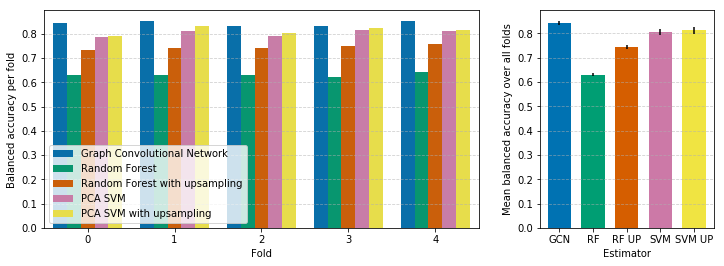

\begin{tabular}{|p{6cm}|p{5cm}|p{5cm}|}
\toprule
                     Estimator &  Mean balanced accuracy over all folds &  Standard deviation of balanced accuracy between folds \\
\midrule
       Graph Convolutional Net &                                  0.843 &                                              0.009 \\
                 Random Forest &                                  0.631 &                                              0.007 \\
 Random Forest with upsampling &                                  0.746 &                                              0.008 \\
                       PCA SVM &                                  0.804 &                                              0.012 \\
       PCA SVM with upsampling &                                  0.812 &                                              0.015 \\
\bottomrule
\end{tabular}



In [489]:
meandf = pd.DataFrame(columns = ["mean", "est", "std","estlong"])
complete = pd.DataFrame(columns = ["balanced_acc", "est", "fold"])

#gcn
filename = gcndir+"within_mixed_gcn"
tmp = pd.read_csv(filename)
tmp.columns = ["fold", "balanced_acc", "auc", "accuracy"]
tmp["est"]="Graph Convolutional Network"
complete = complete.append(tmp[["est","balanced_acc", "fold"]], ignore_index=True)
meandf = meandf.append({'est':'GCN',"mean":np.mean(tmp["balanced_acc"]), 
                        "std": np.std(tmp["balanced_acc"]), "estlong": 'Graph Convolutional Net'}, ignore_index=True)
#rf
filename = pcasvmdir+"within_mixed_rf"
tmp = pd.read_csv(filename)
tmp.columns = ["fold", "balanced_acc", "auc", "accuracy"]
tmp["est"]="Random Forest"
complete = complete.append(tmp[["est","balanced_acc", "fold"]], ignore_index=True)
meandf = meandf.append({'est':'RF',"mean":np.mean(tmp["balanced_acc"]), 
                        "std": np.std(tmp["balanced_acc"]), "estlong": 'Random Forest'}, ignore_index=True)

#rf UP
filename = pcasvmdirUP+"within_mixed_rf"
tmp = pd.read_csv(filename)
tmp.columns = ["fold", "balanced_acc", "auc", "accuracy"]
tmp["est"]="Random Forest with upsampling"
complete = complete.append(tmp[["est","balanced_acc", "fold"]], ignore_index=True)
meandf = meandf.append({'est':'RF UP',"mean":np.mean(tmp["balanced_acc"]), 
                        "std": np.std(tmp["balanced_acc"]), "estlong":'Random Forest with upsampling'}, ignore_index=True)

#pca svm
filename = pcasvmdir+"within_mixed_pcasvm"
tmp = pd.read_csv(filename)
tmp.columns = ["fold", "balanced_acc", "auc", "accuracy"]
tmp["est"]="PCA SVM"
complete = complete.append(tmp[["est","balanced_acc", "fold"]], ignore_index=True)
meandf = meandf.append({'est':'SVM',"mean":np.mean(tmp["balanced_acc"]), 
                        "std": np.std(tmp["balanced_acc"]), "estlong":'PCA SVM'}, ignore_index=True)

#pca svm UP
filename = pcasvmdirUP+"within_mixed_pcasvm"
tmp = pd.read_csv(filename)
tmp.columns = ["fold", "balanced_acc", "auc", "accuracy"]
tmp["est"]="PCA SVM with upsampling"
complete = complete.append(tmp[["est","balanced_acc", "fold"]], ignore_index=True)
meandf = meandf.append({'est':'SVM UP',"mean":np.mean(tmp["balanced_acc"]), 
                        "std": np.std(tmp["balanced_acc"]), "estlong": 'PCA SVM with upsampling'}, ignore_index=True)

fig = plt.figure(figsize=(12,4))
widths = [5, 2]
heights = [1]
spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=widths,
                          height_ratios=heights)
fig.add_subplot(spec[0, 0])
sns.barplot(x="fold", y="balanced_acc", hue="est", data=complete, palette = my_cmap, saturation=0.9)
plt.grid(axis='y', ls='dashed', alpha=0.6)
plt.ylabel("Balanced accuracy per fold")
plt.xlabel("Fold")
plt.legend(loc=3, prop={'size': 10})
fig.add_subplot(spec[0, 1])
plt.bar(meandf["est"], height=meandf["mean"], yerr=meandf["std"], width=0.7, color=my_cmap)
plt.grid(axis='y', ls='dashed', alpha=0.6)
plt.ylabel("Mean balanced accuracy over all folds")
plt.xlabel("Estimator")
#plt.suptitle('Within-all-subjects cross validation results', fontsize=16)
#plt.savefig(cwd+'/reports/'+"mixed.png", dpi=900) 
plt.show()
fig.tight_layout()
meandf = meandf[['estlong', 'mean', 'std']]
meandf.columns = ["Estimator", "Mean balanced accuracy over all folds", 
                  "Standard deviation of balanced accuracy between folds"]
print(meandf.to_latex(index=False, column_format='|p{6cm}|p{5cm}|p{5cm}|', float_format='%.3f'))

In [488]:
print(complete.groupby(["est", "fold"]).min().to_latex(float_format='%.3f'))

\begin{tabular}{llr}
\toprule
                            &   &  balanced\_acc \\
est & fold &               \\
\midrule
Graph Convolutional Network & 0 &         0.846 \\
                            & 1 &         0.854 \\
                            & 2 &         0.833 \\
                            & 3 &         0.832 \\
                            & 4 &         0.852 \\
PCA SVM & 0 &         0.788 \\
                            & 1 &         0.814 \\
                            & 2 &         0.791 \\
                            & 3 &         0.818 \\
                            & 4 &         0.811 \\
PCA SVM with upsampling & 0 &         0.789 \\
                            & 1 &         0.831 \\
                            & 2 &         0.804 \\
                            & 3 &         0.824 \\
                            & 4 &         0.814 \\
Random Forest & 0 &         0.628 \\
                            & 1 &         0.631 \\
                            & 2 &         0.628 \\

# ACROSS SUBJECT CROSS VALIDATION

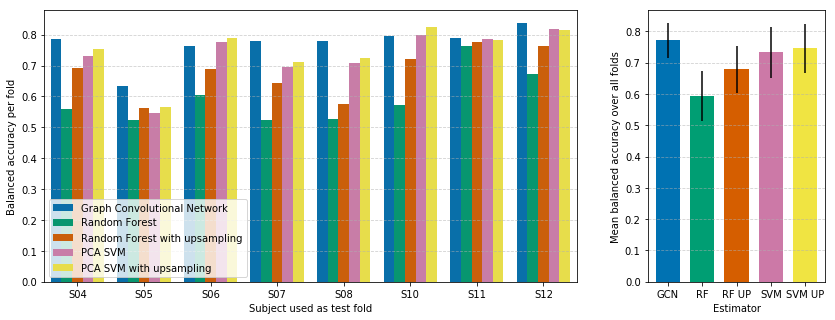

\begin{tabular}{|p{6cm}|p{5cm}|p{5cm}|}
\toprule
                     Estimator &  Mean balanced accuracy over all folds &  Standard deviation of balanced accuracy between folds \\
\midrule
   Graph Convolutional Network &                                  0.771 &                                              0.056 \\
                 Random Forest &                                  0.593 &                                              0.080 \\
 Random Forest with upsampling &                                  0.678 &                                              0.074 \\
                       PCA SVM &                                  0.733 &                                              0.082 \\
       PCA SVM with upsampling &                                  0.746 &                                              0.078 \\
\bottomrule
\end{tabular}



In [481]:
meandf = pd.DataFrame(columns = ["mean", "est", "std","estlong"])
complete = pd.DataFrame(columns = ["balanced_acc", "est", "subj"])

#gcn
filename = gcndir+"across_mixed_gcn"
tmp = pd.read_csv(filename)
tmp.columns = ["subj", "balanced_acc", "auc", "accuracy"]
tmp["est"]="Graph Convolutional Network"
complete = complete.append(tmp[["est","balanced_acc", "subj"]], ignore_index=True)
meandf = meandf.append({'est':'GCN',"mean":np.mean(tmp["balanced_acc"]), 
                        "std": np.std(tmp["balanced_acc"]), "estlong":'Graph Convolutional Network'}, ignore_index=True)
#rf
filename = pcasvmdir+"across_mixed_rf"
tmp = pd.read_csv(filename)
tmp.columns = ["subj", "balanced_acc", "auc", "accuracy"]
tmp["est"]="Random Forest"
complete = complete.append(tmp[["est","balanced_acc", "subj"]], ignore_index=True)
meandf = meandf.append({'est':'RF',"mean":np.mean(tmp["balanced_acc"]), 
                        "std": np.std(tmp["balanced_acc"]), "estlong":'Random Forest'}, ignore_index=True)

#rf with up
filename = pcasvmdirUP+"across_mixed_rf"
tmp = pd.read_csv(filename)
tmp.columns = ["subj", "balanced_acc", "auc", "accuracy"]
tmp["est"]="Random Forest with upsampling"
complete = complete.append(tmp[["est","balanced_acc", "subj"]], ignore_index=True)
meandf = meandf.append({'est':'RF UP',"mean":np.mean(tmp["balanced_acc"]), 
                        "std": np.std(tmp["balanced_acc"]),"estlong":"Random Forest with upsampling"}, ignore_index=True)

#pca svm
filename = pcasvmdir+"across_mixed_pcasvm"
tmp = pd.read_csv(filename)
tmp.columns = ["subj", "balanced_acc", "auc", "accuracy"]
tmp["est"]="PCA SVM"
complete = complete.append(tmp[["est","balanced_acc", "subj"]] , ignore_index=True)
meandf = meandf.append({'est':'SVM',"mean":np.mean(tmp["balanced_acc"]), 
                        "std": np.std(tmp["balanced_acc"]),"estlong":'PCA SVM'}, ignore_index=True)

#pca svm
filename = pcasvmdirUP+"across_mixed_pcasvm"
tmp = pd.read_csv(filename)
tmp.columns = ["subj", "balanced_acc", "auc", "accuracy"]
tmp["est"]="PCA SVM with upsampling"
complete = complete.append(tmp[["est","balanced_acc", "subj"]] , ignore_index=True)
meandf = meandf.append({'est':'SVM UP',"mean":np.mean(tmp["balanced_acc"]), 
                        "std": np.std(tmp["balanced_acc"]),"estlong":"PCA SVM with upsampling"}, ignore_index=True)

fig = plt.figure(figsize=(14,5))
widths = [6, 2]
heights = [1]
spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=widths,
                          height_ratios=heights)
fig.add_subplot(spec[0, 0])
sns.barplot(x="subj", y="balanced_acc", hue="est", data=complete, palette = my_cmap, saturation=0.9)
plt.legend(loc=3, prop={'size': 10})
plt.grid(axis='y', ls='dashed', alpha=0.6)
plt.ylabel("Balanced accuracy per fold")
plt.xlabel("Subject used as test fold")
fig.add_subplot(spec[0, 1])
plt.bar(meandf["est"], height=meandf["mean"], yerr=meandf["std"], width=0.7, color=my_cmap)
plt.grid(axis='y', ls='dashed', alpha=0.6)
plt.ylabel("Mean balanced accuracy over all folds")
plt.xlabel("Estimator")
#plt.suptitle('Across-subjects cross validation results', fontsize=16)
#plt.savefig(cwd+'/reports/'+"across.png", dpi=900) 
plt.show()
fig.tight_layout()
meandf = meandf[['estlong', 'mean', 'std']]
meandf.columns = ["Estimator", "Mean balanced accuracy over all folds", 
                  "Standard deviation of balanced accuracy between folds"]
print(meandf.to_latex(index=False, column_format='|p{6cm}|p{5cm}|p{5cm}|', float_format='%.3f'))

In [485]:
print(complete.groupby(["est", "subj"]).min().to_latex(float_format='%.3f'))

\begin{tabular}{llr}
\toprule
                            &     &  balanced\_acc \\
est & subj &               \\
\midrule
Graph Convolutional Network & S04 &         0.786 \\
                            & S05 &         0.633 \\
                            & S06 &         0.764 \\
                            & S07 &         0.781 \\
                            & S08 &         0.779 \\
                            & S10 &         0.795 \\
                            & S11 &         0.790 \\
                            & S12 &         0.838 \\
PCA SVM & S04 &         0.732 \\
                            & S05 &         0.545 \\
                            & S06 &         0.776 \\
                            & S07 &         0.696 \\
                            & S08 &         0.708 \\
                            & S10 &         0.798 \\
                            & S11 &         0.787 \\
                            & S12 &         0.818 \\
PCA SVM with upsampling & S04 &         0.754 \\
